In [9]:
import numpy as np
data = [1,2,3]
arr = np.array(data)
print(arr)
print(type(arr))

[1 2 3]
<class 'numpy.ndarray'>


In [8]:
import numpy as np

data2d = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

arr = np.array(data2d)

print(data2d[1])
print(arr[:,1])

[4, 5, 6]
[2 5 8]


In [10]:
from pandas import DataFrame

data = {
    '종목코드': ['037730', '036360', '005760'],
    '종목명': ['3R', '3SOFT', 'ACTS'],
    '현재가': [1510, 1790, 1185]
}

df = DataFrame(data)   # DataFrame 클래스의 객체 생성 (생성자 호출)
print(df)

     종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185


In [11]:
from pandas import DataFrame

data = [
    ['037730', '3R', 1510],
    ['036360', '3SOFT', 1790],
    ['005760', 'ACTS', 1185]
]
columns = ["종목코드", "종목명", "현재가"]

df = DataFrame(data=data, columns=columns)
print(df)

     종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185


In [12]:
import pandas as pd

df = pd.read_excel("book-pandas-for-finance-main\ch07\data\loan.xlsx", index_col=0, header=[0,1])
df.head()

전년동월비(%)기준년월 대출고객수           대출잔액           
                전체 1금융권 2금융권   전체  1금융권 2금융권
'21.06         7.1  8.5  5.9  6.7   9.8  3.3
'21.05         8.1  9.7  6.8  7.9  11.4  4.0
'21.04         4.8  5.6  4.2  5.3   8.5  1.9
'21.03         5.1  6.3  4.2  5.1   8.6  1.3
'21.02         5.1  6.6  3.9  5.0   9.0  0.8

In [13]:
대출잔액 = df['대출잔액']
대출잔액 = 대출잔액[::-1]
대출잔액.head()

,전체,1금융권,2금융권
'20.06,2.3,7.4,-2.7
'20.07,2.0,6.9,-2.8
'20.08,2.3,7.4,-2.7
'20.09,2.1,6.6,-2.4
'20.10,0.6,8.5,-7.2


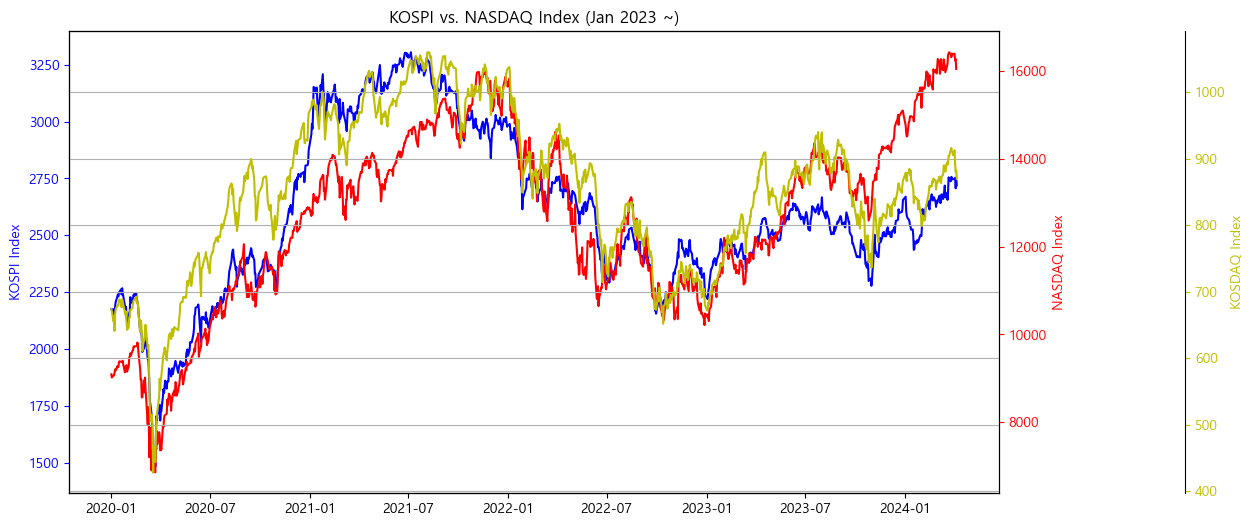

In [30]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from datetime import datetime

start_date = '2020-01-01'
# end_date = '2023-12-31'
end_date = datetime.now()

# 한국
#        KRX : 한국거래소 상장목록
#        KOSPI: 코스피 전체
#        KOSDAQ: 코스닥 전체
#        KONEX: 코넥스 전체
#        KS11: 코스피 지수
#        KQ11: 코스닥 지수
#        KS50: 코스피 50지수
#        KS100: 코스피 100지수
#        KS200: 코스피 200
# 
# 미국
#        NASDAQ: 나스닥 전체 종목
#        NYSE: 뉴욕거래소 전체 종목
#        AMEX: AMEX종목
#        SP500: S&P 500 종목
#        META: 기업 'META'의 주식정보
#        AMZM: 아마존 주식정보
#        DJI: 다우존스 지수
#        IXIC: 나스닥 지수
#        US500: S&P 500 지수
#        VIX: S&P 500 VIX
# 
# 환율
#        USD/KRW: 달러당 원화 환율
#        USD/EUR: 달러당 유로 환율
#        USD/JPY: 달러 당 엔화 환율
#        CYN/KRW: 위엔화 당 원화 환율
#        EUR/USD: 유로화 당 달러 환율
#        JPY/KRW: 엔화 당 원화 환율
# 
# 암호화폐
#       BTC/KRW: 비트코인 원화 가격
#       ETH/KRW: 이더리움 원화가격
#       XRP/KRW: 리플 원화가격
#       BCH/KRW: 비트코인 캐시 원화가격
#       EOS/KRW: 이오스 원화가격
#       LTC/KRW: 라이트코인 원화가격
#       XLM/KRW: 스텔라 원화가격

# 데이터 가져오기
kospi = fdr.DataReader('KS11', start_date, end_date)
nasdaq = fdr.DataReader('IXIC', start_date, end_date)
kosdaq = fdr.DataReader('KQ11', start_date, end_date)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 왼쪽 y축
ax1.plot(kospi.index, kospi['Close'], color='b')
ax1.set_ylabel('KOSPI Index', color='b')
ax1.tick_params('y', colors='b')

# 오른쪽 y축
ax2 = ax1.twinx()
ax2.plot(nasdaq.index, nasdaq['Close'], color='r')
ax2.set_ylabel('NASDAQ Index', color='r')
ax2.tick_params('y', colors='r')

# 오른쪽 y축 추가
ax3 = ax1.twinx()
ax3.plot(kosdaq.index, kosdaq['Close'], color='y')
ax3.set_ylabel('KOSDAQ Index', color='y')
ax3.tick_params('y', colors='y')
ax3.spines.right.set_position(("axes", 1.2))

# x축 설정
plt.xlabel('Date')

# 그래프 제목
plt.title('KOSPI vs. NASDAQ Index (Jan 2023 ~)')

# 격자 라인 추가
plt.grid()
plt.show()

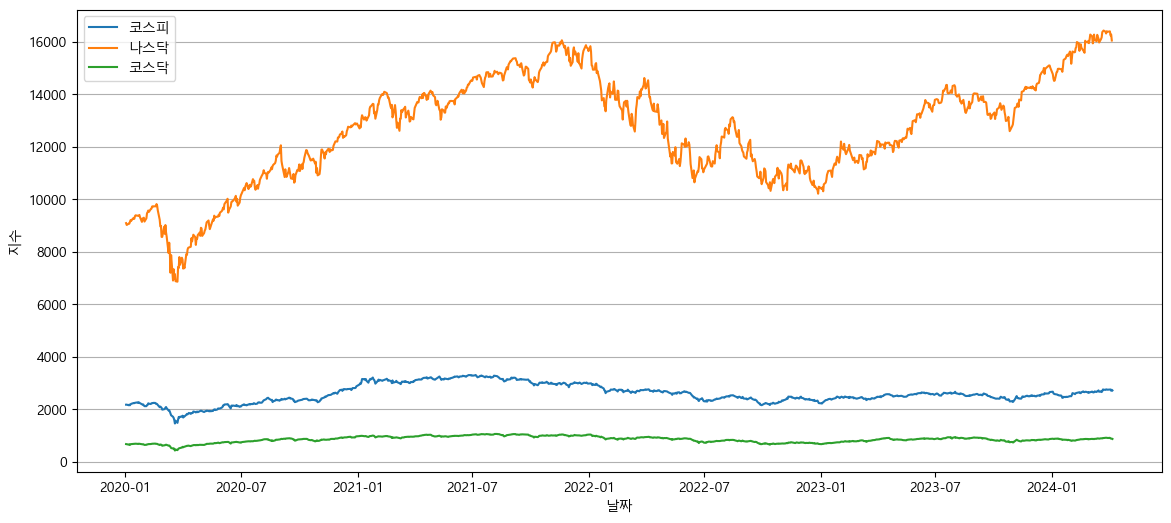

In [32]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import platform

from datetime import datetime

start_date = '2020-01-01'
# end_date = '2023-12-31'
end_date = datetime.now()

# 한국
#        KRX : 한국거래소 상장목록
#        KOSPI: 코스피 전체
#        KOSDAQ: 코스닥 전체
#        KONEX: 코넥스 전체
#        KS11: 코스피 지수
#        KQ11: 코스닥 지수
#        KS50: 코스피 50지수
#        KS100: 코스피 100지수
#        KS200: 코스피 200
# 
# 미국
#        NASDAQ: 나스닥 전체 종목
#        NYSE: 뉴욕거래소 전체 종목
#        AMEX: AMEX종목
#        SP500: S&P 500 종목
#        META: 기업 'META'의 주식정보
#        AMZM: 아마존 주식정보
#        DJI: 다우존스 지수
#        IXIC: 나스닥 지수
#        US500: S&P 500 지수
#        VIX: S&P 500 VIX
# 
# 환율
#        USD/KRW: 달러당 원화 환율
#        USD/EUR: 달러당 유로 환율
#        USD/JPY: 달러 당 엔화 환율
#        CYN/KRW: 위엔화 당 원화 환율
#        EUR/USD: 유로화 당 달러 환율
#        JPY/KRW: 엔화 당 원화 환율
# 
# 암호화폐
#       BTC/KRW: 비트코인 원화 가격
#       ETH/KRW: 이더리움 원화가격
#       XRP/KRW: 리플 원화가격
#       BCH/KRW: 비트코인 캐시 원화가격
#       EOS/KRW: 이오스 원화가격
#       LTC/KRW: 라이트코인 원화가격
#       XLM/KRW: 스텔라 원화가격

if platform.system() == 'Datwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

# 데이터 가져오기
kospi = fdr.DataReader('KS11', start_date, end_date)
nasdaq = fdr.DataReader('IXIC', start_date, end_date)
kosdaq = fdr.DataReader('KQ11', start_date, end_date)

fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)
ax.plot(kospi['Close'], label="코스피")
ax.plot(nasdaq['Close'], label="나스닥")
ax.plot(kosdaq['Close'], label="코스닥")

plt.xlabel('날짜')
plt.ylabel('지수')
#plt.yscale('log')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [33]:
!pip install finance-datareader -q

In [34]:
종목 = {
    # 국내 1
    '455860': 'SOL 2차전지소부장Fn',
    '455850': 'SOL 반도체소부장Fn',
    '244580': 'KODEX 바이오',
    '395290': 'HANARO Fn K-POP&미디어',
    # 국내 2
    '139260': 'TIGER 200 IT',
    '157490': 'TIGER 소프트웨어',
    '091180': 'KODEX 자동차',
    '139230': 'TIGER 200 중공업',
    # 중국
    '371160': 'TIGER 차이나항셍테크',
    '371460': 'TIGER 차이나전기차SOLACTIVE',
    # 아시아
    '245710': 'ACE 베트남VN30(합성)',
    '453810': 'KODEX 인도Nifty50',
    '241180': 'TIGER 일본니케이225',
    # 채권/달러/외환
    '304660': 'KODEX 미국채울트라30년선물(H)',
    '385560': 'KBSTAR KIS국고채30년Enhanced',
    '455030': 'KODEX 미국달러SOFR금리 액티브(합성)',
    '292560': 'TIGER 일본엔선물',
    # 대체투자
    '132030': 'KODEX 골드선물(H)',
    '261220': 'KODEX WTI원유선물(H)',
    '400570': 'KODEX 유럽탄소배출권선물ICE(H)',
}

In [35]:
from FinanceDataReader import DataReader as 데이터
# as ~ : ~라는 이름으로 이후 사용
from tqdm.notebook import tqdm
# tqdm : 파이썬에서 진척도를 시각화해주는 라이브러리

# 딕셔너리 컴프리헨션 ( { 키 : 값 for 임시변수 in 반복가능객체 } )
종목_데이터 = { 코드 : 데이터(코드) for 코드 in tqdm(종목) }
종목_데이터.keys() # 딕셔러니 키들을 불러오기

  0%|          | 0/20 [00:00<?, ?it/s]

dict_keys(['455860', '455850', '244580', '395290', '139260', '157490', '091180', '139230', '371160', '371460', '245710', '453810', '241180', '304660', '385560', '455030', '292560', '132030', '261220', '400570'])

In [36]:
def 수익률(데이터):
    return 데이터[-1] / 데이터[0] - 1
    # -1번째 : 기간 내 가장 최신 (가격) 데이터
    # 0번째 : 기간 내 가장 오래된 (가격) 데이터
    # 전체 데이터의 기간 수익률을 구할 수 있음

def 모멘텀점수(테이블, 기간들):
    종가 = 테이블.Close
    종가모멘텀점수 = lambda 기간: 종가.rolling(기간).apply(수익률).iloc[-1]
    # lambda : 람다 표현식
    # 시리즈.rolling(n) : 한 행을 기준으로 상위 n개의 데이터를 묶음
    # 시리즈.iloc[-1] : Pandas에서 행 기준 인덱싱을 위한 기능
    기간별모멘텀점수 = [종가모멘텀점수(기간) / 기간 for 기간 in 기간들]
    # 리스트 컴프리헨션으로 인자로 전달받은 기간들을 사용하여 기간별 모멘텀 점수를 구하고,
    # 해당 모멘텀 점수를 기간으로 나눠 1일수익률로 환산함
    return sum(기간별모멘텀점수) # 기간별 모멘텀 점수를 합산

# 1개의 모멘텀 점수만 쓰면 과최적화될 수 있기에 임의의 기간을 섞어서 사용
# 이럴 때 피보나치수열을 써주면 좋음 (3, 5, 8, 13, 21, 34, 55 ...)
피보나치수열 = (3, 5, 8, 13, 21) # 임의의 기준임 (바꿔도 됨)
종목_모멘텀점수 = { 코드 : 모멘텀점수(데이터, 피보나치수열)
             for 코드, 데이터 in tqdm(종목_데이터.items())}
# 딕셔너리.items()는 딕셔너리를 (키, 값) 쌍으로 만들어줌
종목_모멘텀점수

  0%|          | 0/20 [00:00<?, ?it/s]

{'455860': -0.04218557547487145,
 '455850': 0.01966825501923461,
 '244580': -0.031148420385135576,
 '395290': -0.015312026587624927,
 '139260': -0.0013676529911791318,
 '157490': -0.03026470978242697,
 '091180': -0.013513369271588714,
 '139230': 0.0013781832889208949,
 '371160': -0.015595204442253121,
 '371460': 0.0031219368831143374,
 '245710': -0.011679336562291417,
 '453810': 0.004923643639470139,
 '241180': -0.014522218424817303,
 '304660': -0.00689952842766069,
 '385560': 0.0006852531711304012,
 '455030': 0.005427424086115041,
 '292560': 0.003596134329541293,
 '132030': 0.010751427264363846,
 '261220': 0.032126691062777615,
 '400570': -0.021981674183394077}

In [37]:
import pandas as pd
# 판다스 : 딕셔너리를 엑셀의 행/열 구조(표)로 바꿔서 분석할 수 있게 하는 라이브러리

def 딕셔너리를표로(딕셔너리, 열이름):
    return pd.DataFrame( # 표(데이터프레임)으로 변환하는 기능
    {'코드': 딕셔너리.keys(), 열이름: 딕셔너리.values()}
    # keys()로 종목명을, values()로 각각 값을 불러서 새로운 열이름(세로)을 가진 표로 만든다만
    ).set_index('코드') # 행별 대표 이름을 종목 코드로 지정함

종목_이름_표 = 딕셔너리를표로(종목, '이름') # 종목과 이름을 담은 표
종목_모멘텀점수_표 = 딕셔너리를표로(종목_모멘텀점수, '모멘텀') # 종목과 모멘텀 점수를 담은 ㅍ
종목_표 = 종목_이름_표\
            .join(종목_모멘텀점수_표)\
            .sort_values('모멘텀', ascending=False)
# 표1.join(표2) : 행 이름(index)를 기준으로 두 표를 병합
# 표.sort_values(열이름): 열이름을 기준으로 정렬해줌
# ascending : 오름차순(작은 값이 먼저), 즉 이 옵션을 False로 하면 내림차순(큰 값이 먼저)으로 정렬됨
종목_표

,이름,모멘텀
코드,,
261220,KODEX WTI원유선물(H),0.032127
455850,SOL 반도체소부장Fn,0.019668
132030,KODEX 골드선물(H),0.010751
455030,KODEX 미국달러SOFR금리 액티브(합성),0.005427
453810,KODEX 인도Nifty50,0.004924
292560,TIGER 일본엔선물,0.003596
371460,TIGER 차이나전기차SOLACTIVE,0.003122
139230,TIGER 200 중공업,0.001378
385560,KBSTAR KIS국고채30년Enhanced,0.000685
